# Material Selection Of E-V Chassis using Machine Learning
 
 The Chassis plays a crucial role in an eletric vehicle as it supports the weight of the vehicle,protects the occupants, and serves as the foundation for the suspension system. Therefore, selecting the best material for the chassis is essential to ensure safety and efficiency.
 
 

1. PROBLEM DEFINITION


The project aims to develop a predictive model to determine the suitability of various materials for use in the construction of Electric Vehicle (EV) chassis. Given a dataset containing mechanical properties of different materials and their respective labels indicating usability ('Yes' or 'No'), the objective is to train a machine learning model to predict whether a material is suitable or unsuitable for an EV chassis based on its mechanical properties alone.

Problem Type: Classification

2. DATA

We utilized a dataset of Machine Design materials, which includes information on their mechanical 
properties. The dataset was obtained from the Autodesk Material Library and comprises 15 columns, 
also referred to as features/attributes. This dataset is a real-world dataset.

The Material Dataset includes the following mechanical properties:

Standard (Std)
Unique Identification code for the Material (ID)
Material Name
Heat Treatment Method
Ultimate Tensile Strength (Su) in MPa
Yield Strength (Sy) in MPa
Elongation at Break or Strain (A5) as a Percentage
Brinell Hardness Number (BHN) in Microhardness Units
Elastic Modulus (E) in MPa
Shear Modulus (G) in MPa
Poisson's Ratio (mu) in Units of Length
Density (Ro) in Kg/m3
Pressure at Yield (pH) in MPa
Description of the Material (Desc)
Vickers Hardness Number (HV)



Here, there are 15 columns called features/attributes in Machine Learning. We are going to use only 7, which are (ID, Ultimate Tensile Strength, Yield Strength, Young’s Modulus, Shear Modulus, Poisson's Ratio, and Density) since other features have missing data.
We added an 8th column in the dataset called Use which contains binary values (Yes/No). This column is called Label. The Label contains Yes or No values

Material Selection using Decision Tree

In [52]:

# Import required libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [53]:
df = pd.read_csv('ev chassis data.csv')
df.head(4)

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN


In [54]:
# Merge the first three columns using string concatenation
df['Material'] = df[['Std', 'Material', 'Heat treatment']].fillna('').agg(' '.join, axis=1)

In [55]:
# Remove any string values from Sy column
df['Sy'] = df['Sy'].str.replace(' max', '').astype(int)

In [56]:
# Drop the unnecessary columns
df.drop(['Std','ID', 'Heat treatment', 'Desc','A5','Bhn','pH','Desc','HV'], axis=1, inplace=True)
df.head(4)

,Material,Su,Sy,E,G,mu,Ro
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860


In [57]:
# Add the 'Use' column based on specific conditions
df['Use'] = (
    (df['Su'].between(292, 683)) &
    (df['Sy'].between(212, 494)) &
    (df['E'].between(196650, 217350)) &
    (df['G'].between(47400, 110600)) &
    (df['mu'].between(0.225, 0.375)) &
    (df['Ro'].between(6288, 9432))
).map({True: 'Yes', False: 'No'})

In [58]:
# Insert the 'Use' column at the second position
df.insert(1, 'Use', df.pop('Use'))

In [59]:
# Separate the features (X) and labels (y)
X = df[['Su', 'Sy', 'E', 'G', 'mu', 'Ro']]
y = df['Use']

In [60]:
# Fit a decision tree classifier on the data
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier()

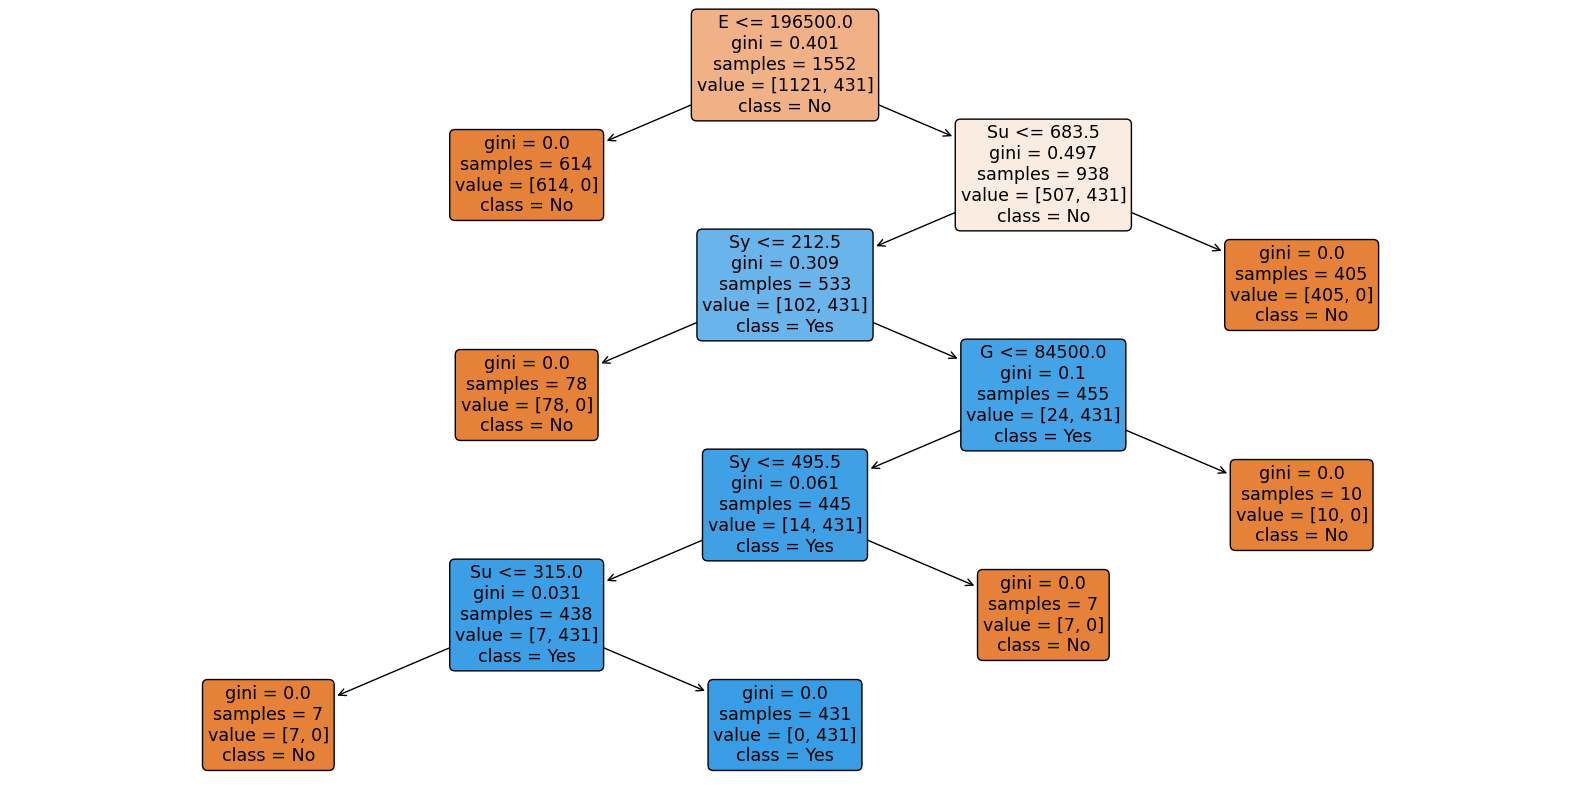

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dtc is your decision tree classifier and X is your DataFrame
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.savefig('decision_tree.png')  # Save the plot as a PNG image
plt.show()


Material Selection using Random Forest

In [62]:
# Define the rating function
def get_rating(row):
    if (438.3 <= row['Su'] <= 535.7 and
        318.6 <= row['Sy'] <= 389.4 and
        204930 <= row['E'] <= 209070 and
        71100 <= row['G'] <= 86900 and
        0.285 <= row['mu'] <= 0.315 and
            7467 <= row['Ro'] <= 8253):
        return 5
    elif (389.6 <= row['Su'] <= 584.4 and
          283.2 <= row['Sy'] <= 424.8 and
          202860 <= row['E'] <= 211140 and
          63200 <= row['G'] <= 94800 and
          0.27 <= row['mu'] <= 0.33 and
          7074 <= row['Ro'] <= 8646):
        return 4
    elif (340.9 <= row['Su'] <= 633.1 and
          247.8 <= row['Sy'] <= 460.2 and
          200790 <= row['E'] <= 213210 and
          55300 <= row['G'] <= 102700 and
          0.255 <= row['mu'] <= 0.345 and
          6681 <= row['Ro'] <= 9039):
        return 3
    elif (292.2 <= row['Su'] <= 681.8 and
          212.4 <= row['Sy'] <= 495.6 and
          198720 <= row['E'] <= 215280 and
          47400 <= row['G'] <= 110600 and
          0.24 <= row['mu'] <= 0.36 and
          6288 <= row['Ro'] <= 9432):
        return 2
    else:
        return 1

In [63]:
# Calculate the rating for each row
df['rating'] = df.apply(get_rating, axis=1)
df.head(4)

,Material,Use,Su,Sy,E,G,mu,Ro,rating
0,ANSI Steel SAE 1015 as-rolled,Yes,421,314,207000,79000,0.3,7860,4
1,ANSI Steel SAE 1015 normalized,Yes,424,324,207000,79000,0.3,7860,4
2,ANSI Steel SAE 1015 annealed,Yes,386,284,207000,79000,0.3,7860,3
3,ANSI Steel SAE 1020 as-rolled,Yes,448,331,207000,79000,0.3,7860,5


In [64]:
# Separate features (X) and target variable (y)
X = df.drop(["rating", "Material", "Use"], axis=1)  # Features (excluding "rating", "Material", and "Use" columns)
y = df["rating"]                                    # Target variable



In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

EVALUATION

In [66]:
model.score(X_test,y_test)

0.9871382636655949

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)







Mean Absolute Error: 0.002577319587628866
Mean Squared Error: 0.002577319587628866
Root Mean Squared Error: 0.05076730825668095
R-squared Score: 0.997695688324029


 Predict the rating of a new material

In [68]:
random_data = np.array([440, 325, 207000, 79000, 0.3, 7860])  # Single row

# Reshape the random data array to match the format (1, 6) for a single sample
new_material = random_data.reshape(1, -1)

# Predict the rating of the new material
new_rating = model.predict(new_material)

print("Predicted rating of the new material:", new_rating)

Predicted rating of the new material: [5]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


VISUALIZATION

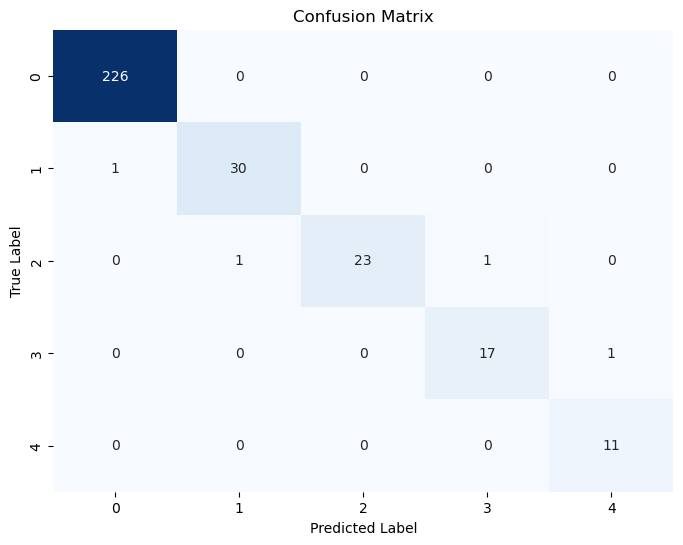

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix as a PNG image
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


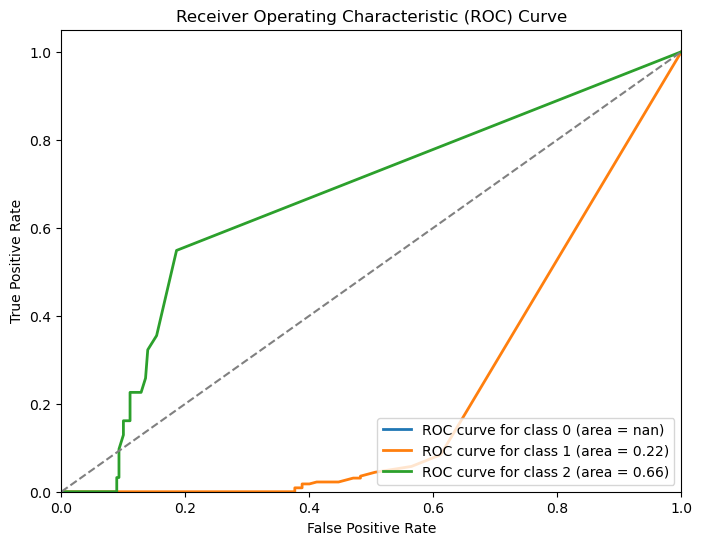

In [72]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for One-vs-Rest strategy
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update the classes accordingly

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save the ROC curve as a PNG image
plt.show()